In [77]:
import numpy as np
import pandas as pd
from math import radians, cos, sin, sqrt, atan2
import gstlearn.plot as gp
import gstlearn as gl
from scipy.stats import linregress
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
data = 'data/pdh_data.parquet'
df_utilisateur = pd.read_parquet(data)

In [79]:
# Filtrer pour ne garder que les colonnes 'category', 'lat', et 'lon'
df_utilisateur = df_utilisateur[['category', 'lat', 'lon']]

# Filtrer les lignes où la colonne 'category' contient 'Known PFAS user' ou 'Presumptive'
df_utilisateur = df_utilisateur[df_utilisateur['category'].isin(['Known PFAS user', 'Presumptive'])]

# Afficher le DataFrame filtré
print(df_utilisateur.shape)
print(df_utilisateur.head())

(12991, 3)
          category        lat       lon
0  Known PFAS user  52.504114 -0.682637
1  Known PFAS user  50.871865  6.034522
2  Known PFAS user  50.223409  8.765597
3  Known PFAS user  47.858601  5.347156
4  Known PFAS user  39.471674 -0.538828


In [80]:
data = 'data/pfas_france_pretraite.parquet'
df_observation = pd.read_parquet(data)
df_observation = df_observation[df_observation["year"] == 2023]

In [81]:
print(df_observation)
df_observation.head()

       category        lat       lon country  dataset_id  \
325421    Known  41.768722  9.173763  France          29   
325267    Known  42.111532  8.930238  France          29   
325216    Known  42.169297  8.819358  France          29   
325115    Known  42.177657  9.406004  France          29   
318640    Known  42.494657  2.718410  France          29   
...         ...        ...       ...     ...         ...   
254993    Known  49.580545 -1.715006  France          29   
238251    Known  49.582219  1.492657  France          29   
254773    Known  49.600906 -1.390587  France          29   
228702    Known  49.621870  2.967412  France          29   
243800    Known  49.833678  1.725811  France          29   

                                              pfas_values  unit  pfas_sum  \
325421  [{"cas_id": "749786-16-1", "unit": "ng/l", "su...  ng/l       0.0   
325267  [{"cas_id": "791563-89-8", "unit": "ng/l", "su...  ng/l       0.0   
325216  [{"cas_id": "749786-16-1", "unit": "ng/l

,category,lat,lon,country,dataset_id,pfas_values,unit,pfas_sum,matrix,date,year
325421,Known,41.768722,9.173763,France,29,"[{""cas_id"": ""749786-16-1"", ""unit"": ""ng/l"", ""su...",ng/l,0.0,Surface water,2023-02-09,2023.0
325267,Known,42.111532,8.930238,France,29,"[{""cas_id"": ""791563-89-8"", ""unit"": ""ng/l"", ""su...",ng/l,0.0,Surface water,2023-01-25,2023.0
325216,Known,42.169297,8.819358,France,29,"[{""cas_id"": ""749786-16-1"", ""unit"": ""ng/l"", ""su...",ng/l,0.0,Surface water,2023-01-25,2023.0
325115,Known,42.177657,9.406004,France,29,"[{""cas_id"": ""1763-23-1"", ""unit"": ""ng/l"", ""subs...",ng/l,9.8,Surface water,2023-08-08,2023.0
318640,Known,42.494657,2.718410,France,29,"[{""cas_id"": ""1763-23-1"", ""unit"": ""ng/l"", ""subs...",ng/l,42.3,Surface water,2023-12-05,2023.0


In [82]:
# Fonction pour calculer la distance entre deux points à partir des coordonnées latitude/longitude
def haversine(lat1, lon1, lat2, lon2):
    # Rayon de la Terre en kilomètres
    R = 6371.0
    
    # Conversion des degrés en radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Différences entre les coordonnées
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Formule de Haversine
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    # Distance en kilomètres
    distance = R * c
    return distance

In [83]:
# Liste pour stocker les distances minimales
distances_min = []

# Pour chaque point d'observation de contamination
for i, row in df_observation.iterrows():
    print(i)
    lat1, lon1 = row['lat'], row['lon']
    
    # Calculer la distance entre ce point et tous les sites dans df_sites
    distances = df_utilisateur.apply(lambda site: haversine(lat1, lon1, site['lat'], site['lon']), axis=1)
    
    # Trouver la distance minimale (le site le plus proche)
    min_distance = distances.min()
    
    # Ajouter la distance minimale à la liste
    distances_min.append(min_distance)

# Ajouter la nouvelle colonne "distance_site" au dataframe de contamination
df_observation['distance_site'] = distances_min

325421
325267
325216
325115
318640
325015
325768
325756
318892
319021
326213
319459
336621
319898
326061
320583
320667
320306
319792
293474
341974
320186
319746
323752
321272
291656
342061
295541
321992
322316
321168
300380
330837
330753
321058
324595
322748
313989
324464
313891
331063
313840
326542
313511
312419
312720
325932
312440
317003
312086
312219
330590
329166
311845
316788
336615
316887
311260
315592
329390
311312
311152
338912
311143
310919
341648
316425
330289
310708
316229
330476
336804
315170
315924
257813
275800
315892
257883
316121
259556
259516
316064
330197
310329
258017
331839
329520
314616
341809
310234
259623
259585
330556
262558
309953
330513
258160
330092
308192
300450
329846
301038
308254
258250
259660
301021
324923
324700
341633
258451
331921
259700
261205
259777
306765
306909
328795
328796
305996
300689
309405
331942
259840
258495
305924
306917
309490
316358
307491
259966
306913
300681
300685
306929
331938
328800
300696
263441
305870
331835
260017
332336
300867

In [92]:
# Calcul de la corrélation linéaire
corr_coef = df_observation['distance_site'].corr(df_observation['pfas_sum'])

# Régression linéaire
slope, intercept, r_value, p_value, std_err = linregress(df_observation['distance_site'], df_observation['pfas_sum'])

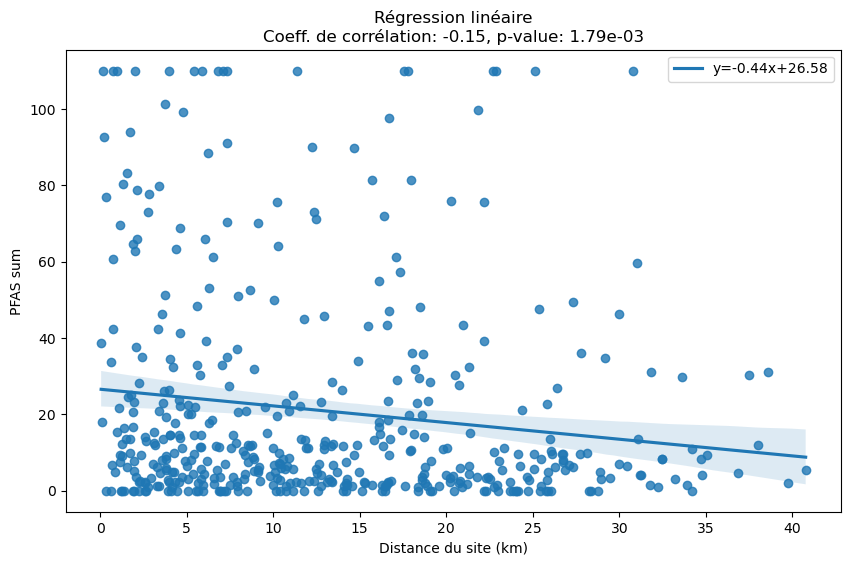

In [93]:
# Plot des données avec la régression linéaire
plt.figure(figsize=(10, 6))
sns.regplot(x='distance_site', y='pfas_sum', data=df_observation, line_kws={'label': f"y={slope:.2f}x+{intercept:.2f}"})
plt.xlabel('Distance du site (km)')
plt.ylabel('PFAS sum')
plt.title(f"Régression linéaire\nCoeff. de corrélation: {corr_coef:.2f}, p-value: {p_value:.2e}")
plt.legend()
plt.show()

In [94]:
df_observation.to_parquet('data/pfas_france_pretraite_dist_site.parquet')